<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_data_multi_delta_(_2_4)_n120_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/multiplication_pattern/multiplication_delta_-2.4'

In [4]:
os.listdir(base_path)

['data_multi_delta_-2.4_n20.csv',
 'data_multi_delta_-2.4_n30.csv',
 'data_multi_delta_-2.4_n60.csv',
 'data_multi_delta_-2.4_n120.csv',
 'data_multi_delta_-2.4_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-2.4_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,54.679362,37.445069,75.851609,-0.000203,177.975838,177.975978,-0.000140
1,0.0,1.0,39.889931,26.233212,48.763099,0.000238,124.886480,124.886191,0.000289
2,0.0,2.0,36.696234,84.313349,73.379609,0.000022,204.389214,204.389217,-0.000003
3,0.0,3.0,24.979168,41.809179,58.545499,0.000057,135.333903,135.333821,0.000082
4,0.0,4.0,60.932586,41.572519,32.147022,0.000059,144.652186,144.652104,0.000082
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,81.105212,76.970821,48.600850,-0.000040,216.676843,216.676892,-0.000049
119996,999.0,116.0,53.780079,31.967663,97.201395,0.000186,192.949324,192.949056,0.000268
119997,999.0,117.0,83.189612,83.019716,95.371444,0.000030,271.580801,271.580701,0.000100
119998,999.0,118.0,50.202262,24.045901,56.287473,-0.000183,140.535452,140.535623,-0.000171


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,54.679362,37.445069,75.851609,-0.000203,177.975838,177.975978,-0.000140
1,0.0,1.0,39.889931,26.233212,48.763099,0.000238,124.886480,124.886191,0.000289
2,0.0,2.0,36.696234,84.313349,73.379609,0.000022,204.389214,204.389217,-0.000003
3,0.0,3.0,24.979168,41.809179,58.545499,0.000057,135.333903,135.333821,0.000082
4,0.0,4.0,60.932586,41.572519,32.147022,0.000059,144.652186,144.652104,0.000082
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,81.105212,76.970821,48.600850,-0.000040,216.676843,216.676892,-0.000049
119996,999.0,116.0,53.780079,31.967663,97.201395,0.000186,192.949324,192.949056,0.000268
119997,999.0,117.0,83.189612,83.019716,95.371444,0.000030,271.580801,271.580701,0.000100
119998,999.0,118.0,50.202262,24.045901,56.287473,-0.000183,140.535452,140.535623,-0.000171


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    54.679362  37.445069  75.851609  ...  177.975838  177.975978 -0.000140
      1.0    39.889931  26.233212  48.763099  ...  124.886480  124.886191  0.000289
      2.0    36.696234  84.313349  73.379609  ...  204.389214  204.389217 -0.000003
      3.0    24.979168  41.809179  58.545499  ...  135.333903  135.333821  0.000082
      4.0    60.932586  41.572519  32.147022  ...  144.652186  144.652104  0.000082
...                ...        ...        ...  ...         ...         ...       ...
999.0 115.0  81.105212  76.970821  48.600850  ...  216.676843  216.676892 -0.000049
      116.0  53.780079  31.967663  97.201395  ...  192.949324  192.949056  0.000268
      117.0  83.189612  83.019716  95.371444  ...  271.580801  271.580701  0.000100
      118.0  50.202262  24.045901  56.287473  ...  140.535452  140.535623 -0.000171
      119.0  35.244935  46.619108  30.330005  ...  122.194156  122.194086  0.000070

[120000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    54.679362  37.445069  75.851609  ...  177.975838  177.975978 -0.000140
      1.0    39.889931  26.233212  48.763099  ...  124.886480  124.886191  0.000289
      2.0    36.696234  84.313349  73.379609  ...  204.389214  204.389217 -0.000003
      3.0    24.979168  41.809179  58.545499  ...  135.333903  135.333821  0.000082
      4.0    60.932586  41.572519  32.147022  ...  144.652186  144.652104  0.000082
...                ...        ...        ...  ...         ...         ...       ...
999.0 115.0  81.105212  76.970821  48.600850  ...  216.676843  216.676892 -0.000049
      116.0  53.780079  31.967663  97.201395  ...  192.949324  192.949056  0.000268
      117.0  83.189612  83.019716  95.371444  ...  271.580801  271.580701  0.000100
      118.0  50.202262  24.045901  56.287473  ...  140.535452  140.535623 -0.000171
      119.0  35.244935  46.619108  30.330005  ...  122.194156  122.194086  0.000070

[120000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,54.679362,37.445069,75.851609,-0.000203,177.975838,177.975978,-0.000140
1,0.0,1.0,39.889931,26.233212,48.763099,0.000238,124.886480,124.886191,0.000289
2,0.0,2.0,36.696234,84.313349,73.379609,0.000022,204.389214,204.389217,-0.000003
3,0.0,3.0,24.979168,41.809179,58.545499,0.000057,135.333903,135.333821,0.000082
4,0.0,4.0,60.932586,41.572519,32.147022,0.000059,144.652186,144.652104,0.000082
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,81.105212,76.970821,48.600850,-0.000040,216.676843,216.676892,-0.000049
119996,999.0,116.0,53.780079,31.967663,97.201395,0.000186,192.949324,192.949056,0.000268
119997,999.0,117.0,83.189612,83.019716,95.371444,0.000030,271.580801,271.580701,0.000100
119998,999.0,118.0,50.202262,24.045901,56.287473,-0.000183,140.535452,140.535623,-0.000171


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    54.679362  37.445069  75.851609  ...  177.975838  177.975978 -0.000140
      1.0    39.889931  26.233212  48.763099  ...  124.886480  124.886191  0.000289
      2.0    36.696234  84.313349  73.379609  ...  204.389214  204.389217 -0.000003
      3.0    24.979168  41.809179  58.545499  ...  135.333903  135.333821  0.000082
      4.0    60.932586  41.572519  32.147022  ...  144.652186  144.652104  0.000082
...                ...        ...        ...  ...         ...         ...       ...
999.0 115.0  81.105212  76.970821  48.600850  ...  216.676843  216.676892 -0.000049
      116.0  53.780079  31.967663  97.201395  ...  192.949324  192.949056  0.000268
      117.0  83.189612  83.019716  95.371444  ...  271.580801  271.580701  0.000100
      118.0  50.202262  24.045901  56.287473  ...  140.535452  140.535623 -0.000171
      119.0  35.244935  46.619108  30.330005  ...  122.194156  122.194086  0.000070

[120000 rows x 7 columns]

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]

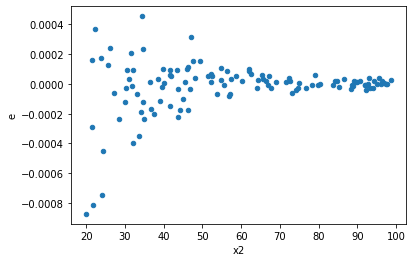

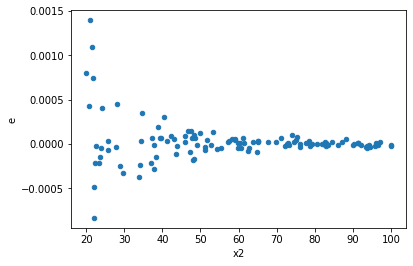

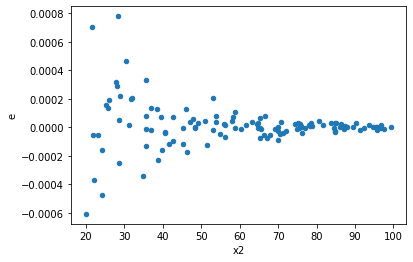

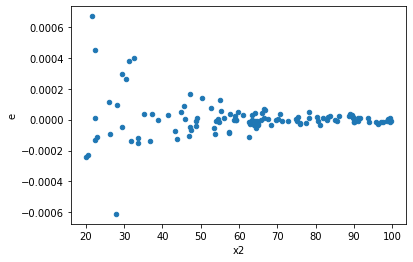

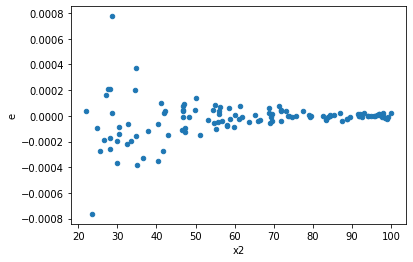

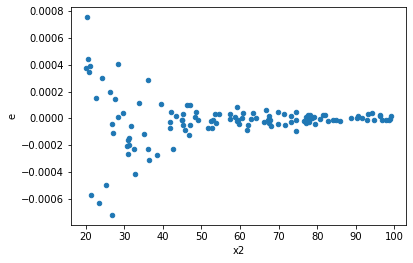

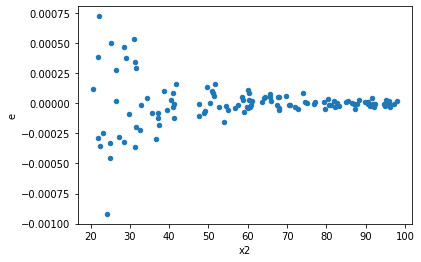

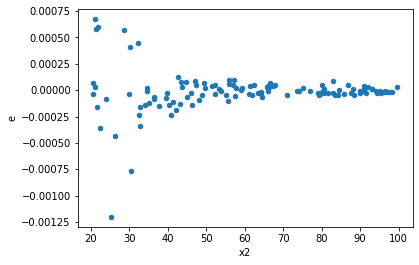

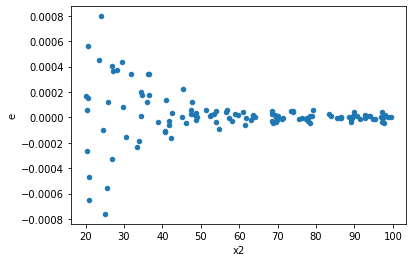

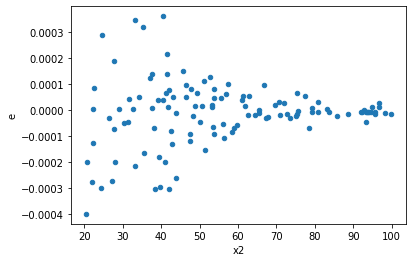

In [13]:
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [14]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = model1.mse_resid


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = model2.mse_resid

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    
    return df2, df1, SSE2, SSE1, MSE2, MSE1, GQ_test, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,Result_test
Replicate,,,,,,,,,,


In [16]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,45.0,45.0,3.24824830362289e-08,3.1020640628968704e-06,7.382382508233842e-10,7.050145597492887e-08,0.010471248297140277,7.487886620387193e-33,Reject005=0 : Heteroscedasticity
1.0,45.0,45.0,3.338279502306349e-08,6.083161219429932e-06,7.586998868878066e-10,1.38253664077953e-07,0.005487738006422896,4.500166840652185e-39,Reject005=0 : Heteroscedasticity
2.0,45.0,45.0,2.6815005711566763e-08,2.731398291948765e-06,6.094319479901537e-10,6.207723390792648e-08,0.0098173180347254,1.804437783786837e-33,Reject005=0 : Heteroscedasticity
3.0,45.0,45.0,1.8767747394046446e-08,1.7747406145200785e-06,4.265397135010556e-10,4.033501396636542e-08,0.010574924155393593,9.304935234943201e-33,Reject005=0 : Heteroscedasticity
4.0,45.0,45.0,2.1535647509087304e-08,2.256560950060375e-06,4.894465342974388e-10,5.1285476137735794e-08,0.009543570054472098,9.662029255227609e-34,Reject005=0 : Heteroscedasticity
5.0,45.0,45.0,3.826611805062234e-08,3.7050402919918356e-06,8.696845011505078e-10,8.420546118163263e-08,0.010328124672039779,5.5274719382734885e-33,Reject005=0 : Heteroscedasticity
6.0,45.0,45.0,3.98716961314143e-08,3.7402668403426426e-06,9.061749120775977e-10,8.500606455324188e-08,0.01066012074362098,1.11057009431003e-32,Reject005=0 : Heteroscedasticity
7.0,45.0,45.0,4.195481352317126e-08,4.516188308980068e-06,9.53518489162983e-10,1.0264064338591065e-07,0.009289872488210373,5.3271442060542625e-34,Reject005=0 : Heteroscedasticity
8.0,45.0,45.0,2.716273971851836e-08,3.967759022139089e-06,6.1733499360269e-10,9.017634141225203e-08,0.006845864269215232,6.148413211542077e-37,Reject005=0 : Heteroscedasticity


In [17]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    1000
Name: Result_test, dtype: int64